Installing Libraries

In [1]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1c/19/bf19123baf16a55fd38cbb100b5a49380b9b6db7279987034689d11254c7/yfinance-0.2.32-py2.py3-none-any.whl.metadata
  Using cached yfinance-0.2.32-py2.py3-none-any.whl.metadata (11 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Obtaining dependency information for lxml>=4.9.1 from https://files.pythonhosted.org/packages/3c/d2/11533f0bc47ff4d828a20cfb702f3453fe714bd5b475fcdc8cec6e6b7dcf/lxml-4.9.3-cp310-cp310-manylinux_2_28_x86_64.whl.metadata
  Using cached lxml-4.9.3-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.8 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/bf/e8/6eb098234b607ed660501a951b4b9190bf7bceff10a66cda828f32ad6e1a/frozendict-2.3.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached frozendict-2.3.10-cp310-cp310-ma

In [2]:
pip install tensorflow

  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/ea/df/55525e489c43f9dbb6c8ea27d8a567b3dcd18a22f3c45483055f5ca6611d/libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl.metadata
  Using cached libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
Using cached libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl (22.9 MB)
Note: you may need to restart the kernel to use updated packages.


Importing Libraries

In [3]:
from google.cloud import bigquery
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.cloud import bigquery



Downloading the dataset from yfinance API and data is stored in Big Query

def Download_Dataset(stocks):
    df_stocks = yf.download(stocks, start='2018-01-01', end='2023-11-26')
    df_stocks = df_stocks.reset_index()
    df_stocks['Date'] = df_stocks['Date'].dt.strftime('%Y-%m-%d')
    df_stocks.insert(0, 'Stock', stocks)
    rows_to_insert = df_stocks.to_dict(orient='records')
    
    errors = client.insert_rows_json("serene-coyote-399200.Stock_Data.Stock_dataset", rows_to_insert)  # Make an API request.
    if errors == []:
        print("New rows have been added.")
    else:
        print("Encountered errors while inserting rows: {}".format(errors))
        
client = bigquery.Client()    
stocks_list=['AAPL','GOOGL','NVDA']
for stocks in stocks_list:
    Download_Dataset(stocks)

In [4]:

client = bigquery.Client() 
df_stocks = yf.download('AAPL', start='2018-01-01', end='2023-10-20')
query = """ SELECT * FROM `serene-coyote-399200.Stock_Data.Stock_dataset` """
df_stocks = client.query(query).to_dataframe()
df_stocks

[*********************100%%**********************]  1 of 1 completed


,Stock,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722870,102223600
1,AAPL,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715786,118071600
2,AAPL,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904907,89738400
3,AAPL,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370621,94640000
4,AAPL,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216965,82271200
...,...,...,...,...,...,...,...,...
4450,NVDA,2023-11-17,495.239990,497.170013,490.070007,492.980011,492.980011,32520500
4451,NVDA,2023-11-20,493.119995,505.480011,491.809998,504.089996,504.089996,41412000
4452,NVDA,2023-11-21,501.260010,505.170013,492.220001,499.440002,499.440002,56574700
4453,NVDA,2023-11-22,498.519989,503.350006,476.899994,487.160004,487.160004,89942000


In [5]:
df_stocks.shape

(4455, 8)

In [6]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Stock      4455 non-null   object 
 1   Date       4455 non-null   object 
 2   Open       4455 non-null   float64
 3   High       4455 non-null   float64
 4   Low        4455 non-null   float64
 5   Close      4455 non-null   float64
 6   Adj Close  4455 non-null   float64
 7   Volume     4455 non-null   Int64  
dtypes: Int64(1), float64(5), object(2)
memory usage: 282.9+ KB


In [7]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'], format='%Y-%m-%d')

In [8]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Stock      4455 non-null   object        
 1   Date       4455 non-null   datetime64[ns]
 2   Open       4455 non-null   float64       
 3   High       4455 non-null   float64       
 4   Low        4455 non-null   float64       
 5   Close      4455 non-null   float64       
 6   Adj Close  4455 non-null   float64       
 7   Volume     4455 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), float64(5), object(1)
memory usage: 282.9+ KB


Data Visualization

AAPL

In [9]:
df_apple_stocks = df_stocks.loc[df_stocks['Stock']=='AAPL']
df_apple_stocks

,Stock,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722870,102223600
1,AAPL,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715786,118071600
2,AAPL,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904907,89738400
3,AAPL,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370621,94640000
4,AAPL,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216965,82271200
...,...,...,...,...,...,...,...,...
1480,AAPL,2023-11-17,190.250000,190.380005,188.570007,189.690002,189.690002,50922700
1481,AAPL,2023-11-20,189.889999,191.910004,189.880005,191.449997,191.449997,46505100
1482,AAPL,2023-11-21,191.410004,191.520004,189.740005,190.639999,190.639999,38134500
1483,AAPL,2023-11-22,191.490005,192.929993,190.830002,191.309998,191.309998,39617700


In [10]:
df_google_stocks = df_stocks.loc[df_stocks['Stock']=='GOOGL']
df_google_stocks


,Stock,Date,Open,High,Low,Close,Adj Close,Volume
1485,GOOGL,2018-01-02,52.651001,53.799000,52.651001,53.660500,53.660500,31766000
1486,GOOGL,2018-01-03,53.696499,54.805000,53.671501,54.576000,54.576000,31318000
1487,GOOGL,2018-01-04,54.854500,55.203999,54.713001,54.787998,54.787998,26052000
1488,GOOGL,2018-01-05,55.172501,55.679001,55.090000,55.514500,55.514500,30250000
1489,GOOGL,2018-01-08,55.549999,55.958000,55.500000,55.710499,55.710499,24644000
...,...,...,...,...,...,...,...,...
2965,GOOGL,2023-11-17,136.000000,136.059998,133.649994,135.309998,135.309998,37240600
2966,GOOGL,2023-11-20,133.690002,136.660004,133.619995,136.250000,136.250000,27815500
2967,GOOGL,2023-11-21,136.289993,137.179993,135.960007,136.970001,136.970001,22635300
2968,GOOGL,2023-11-22,137.470001,139.419998,137.470001,138.490005,138.490005,17813900


In [11]:
df_nvda_stocks = df_stocks.loc[df_stocks['Stock']=='NVDA']
df_nvda_stocks

,Stock,Date,Open,High,Low,Close,Adj Close,Volume
2970,NVDA,2018-01-02,48.945000,49.875000,48.625000,49.837502,49.317123,35561600
2971,NVDA,2018-01-03,51.025002,53.424999,50.937500,53.117500,52.562878,91470400
2972,NVDA,2018-01-04,53.939999,54.512501,53.172501,53.397499,52.839951,58326800
2973,NVDA,2018-01-05,53.547501,54.227501,52.770000,53.849998,53.287724,58012400
2974,NVDA,2018-01-08,55.099998,56.250000,54.645000,55.500000,54.920494,88121600
...,...,...,...,...,...,...,...,...
4450,NVDA,2023-11-17,495.239990,497.170013,490.070007,492.980011,492.980011,32520500
4451,NVDA,2023-11-20,493.119995,505.480011,491.809998,504.089996,504.089996,41412000
4452,NVDA,2023-11-21,501.260010,505.170013,492.220001,499.440002,499.440002,56574700
4453,NVDA,2023-11-22,498.519989,503.350006,476.899994,487.160004,487.160004,89942000


In [12]:
# Take only close
df_apple=df_apple_stocks.reset_index()['Close']
df_apple

0        43.064999
1        43.057499
2        43.257500
3        43.750000
4        43.587502
           ...    
1480    189.690002
1481    191.449997
1482    190.639999
1483    191.309998
1484    189.970001
Name: Close, Length: 1485, dtype: float64

Linear 

In [13]:
df_apple_stocks

,Stock,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.722870,102223600
1,AAPL,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715786,118071600
2,AAPL,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904907,89738400
3,AAPL,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370621,94640000
4,AAPL,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216965,82271200
...,...,...,...,...,...,...,...,...
1480,AAPL,2023-11-17,190.250000,190.380005,188.570007,189.690002,189.690002,50922700
1481,AAPL,2023-11-20,189.889999,191.910004,189.880005,191.449997,191.449997,46505100
1482,AAPL,2023-11-21,191.410004,191.520004,189.740005,190.639999,190.639999,38134500
1483,AAPL,2023-11-22,191.490005,192.929993,190.830002,191.309998,191.309998,39617700


In [14]:
df_google_stocks

,Stock,Date,Open,High,Low,Close,Adj Close,Volume
1485,GOOGL,2018-01-02,52.651001,53.799000,52.651001,53.660500,53.660500,31766000
1486,GOOGL,2018-01-03,53.696499,54.805000,53.671501,54.576000,54.576000,31318000
1487,GOOGL,2018-01-04,54.854500,55.203999,54.713001,54.787998,54.787998,26052000
1488,GOOGL,2018-01-05,55.172501,55.679001,55.090000,55.514500,55.514500,30250000
1489,GOOGL,2018-01-08,55.549999,55.958000,55.500000,55.710499,55.710499,24644000
...,...,...,...,...,...,...,...,...
2965,GOOGL,2023-11-17,136.000000,136.059998,133.649994,135.309998,135.309998,37240600
2966,GOOGL,2023-11-20,133.690002,136.660004,133.619995,136.250000,136.250000,27815500
2967,GOOGL,2023-11-21,136.289993,137.179993,135.960007,136.970001,136.970001,22635300
2968,GOOGL,2023-11-22,137.470001,139.419998,137.470001,138.490005,138.490005,17813900


In [15]:
df_apple_stocks_linear  = df_apple_stocks.drop(['Stock', 'Open','High','Low','Adj Close', 'Volume'],axis = 1)

In [16]:
df_apple_stocks_linear

,Date,Close
0,2018-01-02,43.064999
1,2018-01-03,43.057499
2,2018-01-04,43.257500
3,2018-01-05,43.750000
4,2018-01-08,43.587502
...,...,...
1480,2023-11-17,189.690002
1481,2023-11-20,191.449997
1482,2023-11-21,190.639999
1483,2023-11-22,191.309998


In [17]:
df_apple_stocks_linear['Date'] = pd.to_datetime(df_apple_stocks_linear.Date,format='%Y-%m-%d')
df_apple_stocks_linear.index = df_apple_stocks_linear['Date']

#sorting
data = df_apple_stocks_linear.sort_index(ascending=True, axis=0)

In [18]:
df_apple_stocks_linear['Days'] = (df_apple_stocks_linear['Date'] - df_apple_stocks_linear['Date'].min()).dt.days

In [19]:
df_apple_stocks_linear.set_index('Date',inplace = True)

In [20]:
df_apple_stocks_linear

,Close,Days
Date,,
2018-01-02,43.064999,0
2018-01-03,43.057499,1
2018-01-04,43.257500,2
2018-01-05,43.750000,3
2018-01-08,43.587502,6
...,...,...
2023-11-17,189.690002,2145
2023-11-20,191.449997,2148
2023-11-21,190.639999,2149


In [21]:
train_linear = df_apple_stocks_linear.iloc[:-100]
test_linear = df_apple_stocks_linear.iloc[-100:]

In [22]:
x_train = train_linear['Days']
y_train = train_linear['Close']
x_test = test_linear['Days']
y_test = test_linear['Close']

x_train_reshaped = np.array(x_train).reshape(-1, 1)
y_train_reshaped = np.array(y_train).reshape(-1, 1)

x_test_reshaped = np.array(x_test).reshape(-1, 1)
y_test_reshaped = np.array(y_test).reshape(-1, 1)

#implement linear regression
from sklearn.linear_model import LinearRegression
model_lm = LinearRegression()
model_lm.fit(x_train_reshaped,y_train_reshaped)

LinearRegression()

In [23]:
predictionsLM = model_lm.predict(x_test_reshaped)
rms=np.sqrt(np.mean(np.power((np.array(y_test_reshaped)-np.array(predictionsLM)),2)))
rms

11.342481602316933

In [24]:
predictionsLM.shape

(100, 1)

/tmp/ipykernel_1/1578273221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_linear['Predictions'] = 0
/tmp/ipykernel_1/1578273221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_linear['Predictions'] = predictionsLM


Text(0.5, 1.0, 'Predictions of apple')

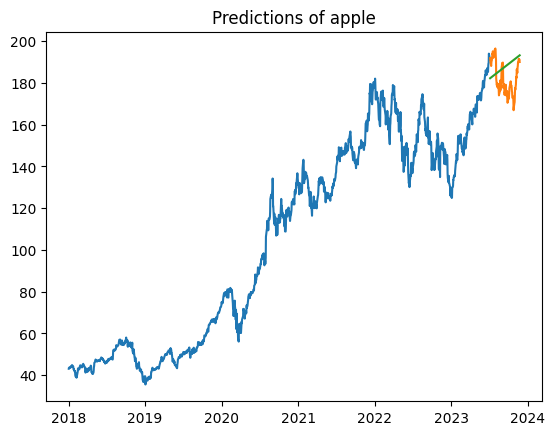

In [25]:
test_linear['Predictions'] = 0
test_linear['Predictions'] = predictionsLM

test_linear.index = df_apple_stocks_linear.iloc[-100:].index
train_linear.index = df_apple_stocks_linear.iloc[:-100].index

plt.plot(train_linear['Close'])
plt.plot(test_linear[['Close', 'Predictions']])
plt.title("Predictions of apple")

In [26]:
test_linear

,Close,Days,Predictions
Date,,,
2023-07-06,191.809998,2011,182.205892
2023-07-07,190.679993,2012,182.283671
2023-07-10,188.610001,2015,182.517007
2023-07-11,188.080002,2016,182.594786
2023-07-12,189.770004,2017,182.672565
...,...,...,...
2023-11-17,189.690002,2145,192.628259
2023-11-20,191.449997,2148,192.861596
2023-11-21,190.639999,2149,192.939375


In [27]:
test_linear.index[99]

Timestamp('2023-11-24 00:00:00')

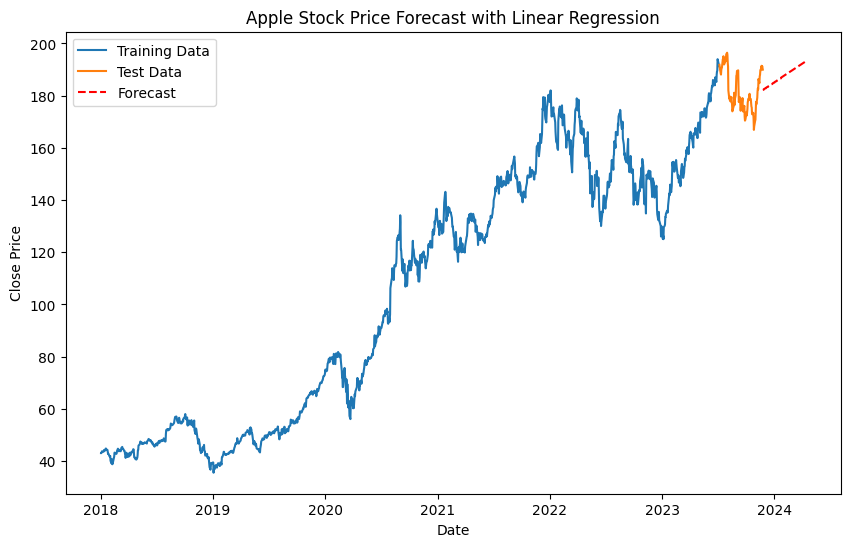

In [28]:
forecast_index = pd.date_range(start=test_linear.index[99], periods=100, freq='B')
forecast_df = pd.DataFrame(predictionsLM, index=forecast_index, columns=['Forecast'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_linear['Close'], label='Training Data')
plt.plot(test_linear['Close'], label='Test Data')
plt.plot(forecast_df, label='Forecast', linestyle='dashed', color='red')

plt.title('Apple Stock Price Forecast with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [29]:
forecast_df

,Forecast
2023-11-24,182.205892
2023-11-27,182.283671
2023-11-28,182.517007
2023-11-29,182.594786
2023-11-30,182.672565
...,...
2024-04-05,192.628259
2024-04-08,192.861596
2024-04-09,192.939375
2024-04-10,193.017154


In [30]:
df_google_stocks_linear = df_google_stocks.drop(['Stock', 'Open','High','Low','Adj Close', 'Volume'],axis = 1)

In [31]:
df_google_stocks_linear['Date'] = pd.to_datetime(df_google_stocks_linear.Date,format='%Y-%m-%d')
df_google_stocks_linear.index = df_google_stocks_linear['Date']

#sorting
data = df_google_stocks_linear.sort_index(ascending=True, axis=0)

In [32]:
df_google_stocks_linear['Days'] = (df_google_stocks_linear['Date'] - df_google_stocks_linear['Date'].min()).dt.days

In [33]:
df_google_stocks_linear.set_index('Date',inplace = True)

In [34]:
train_linear_google = df_google_stocks_linear.iloc[:-100]
test_linear_google = df_google_stocks_linear.iloc[-100:]

In [36]:
x_train_google = train_linear_google['Days']
y_train_google = train_linear_google['Close']
x_test_google= test_linear_google['Days']
y_test_google = test_linear_google['Close']

x_train_reshaped_google = np.array(x_train_google).reshape(-1, 1)
y_train_reshaped_google = np.array(y_train_google).reshape(-1, 1)

x_test_reshaped_google = np.array(x_test_google).reshape(-1, 1)
y_test_reshaped_google = np.array(y_test_google).reshape(-1, 1)

#implement linear regression
from sklearn.linear_model import LinearRegression
model_lm_google = LinearRegression()
model_lm_google.fit(x_train_reshaped_google,y_train_reshaped_google)

LinearRegression()

In [37]:
y_test_google

Date
2023-07-06    120.110001
2023-07-07    119.480003
2023-07-10    116.449997
2023-07-11    117.139999
2023-07-12    118.930000
                 ...    
2023-11-17    135.309998
2023-11-20    136.250000
2023-11-21    136.970001
2023-11-22    138.490005
2023-11-24    136.690002
Name: Close, Length: 100, dtype: float64

In [38]:
x_test_reshaped_google.shape

(100, 1)

In [39]:
predictionsLM_google = model_lm_google.predict(x_test_reshaped_google)
rms = np.sqrt(np.mean(np.power((y_test_reshaped_google - predictionsLM_google), 2)))
print("RMSE:", rms)



RMSE: 5.187067710161403


/tmp/ipykernel_1/761919141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_linear_google['Predictions'] = 0
/tmp/ipykernel_1/761919141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_linear_google['Predictions'] = predictionsLM_google


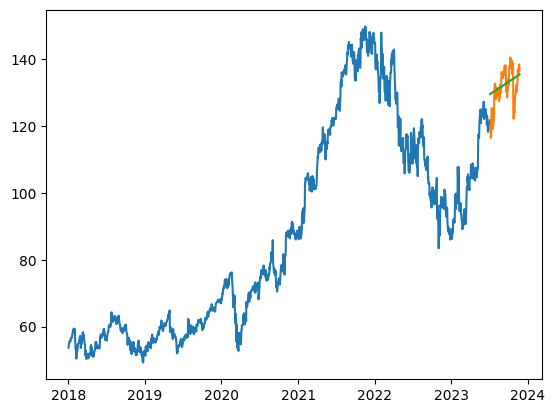

In [40]:
test_linear_google['Predictions'] = 0
test_linear_google['Predictions'] = predictionsLM_google

test_linear_google.index = df_google_stocks_linear.iloc[-100:].index
train_linear_google.index = df_google_stocks_linear.iloc[:-100].index

plt.plot(train_linear_google['Close'])
plt.plot(test_linear_google[['Close', 'Predictions']])



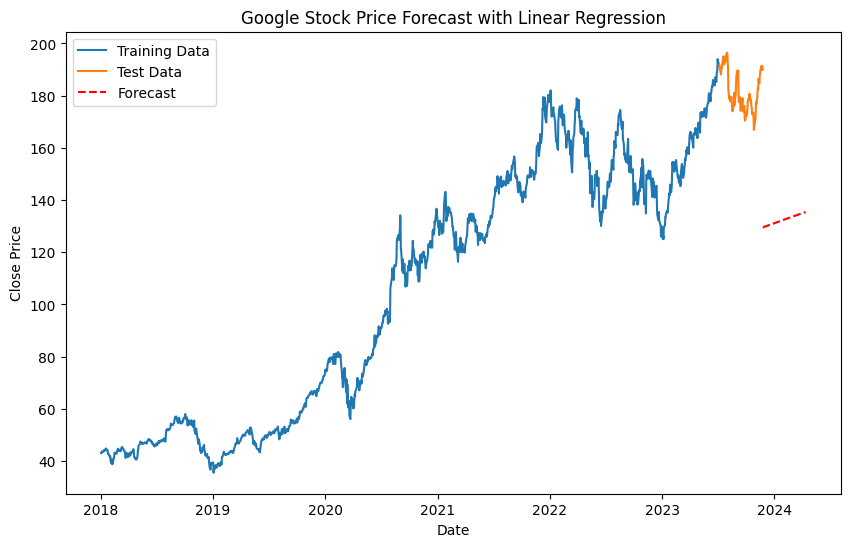

In [41]:
forecast_index = pd.date_range(start=test_linear.index[99], periods=100, freq='B')
forecast_df = pd.DataFrame(predictionsLM_google, index=forecast_index, columns=['Forecast'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_linear['Close'], label='Training Data')
plt.plot(test_linear['Close'], label='Test Data')
plt.plot(forecast_df, label='Forecast', linestyle='dashed', color='red')

plt.title('Google Stock Price Forecast with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [42]:
df_nvda_stocks_linear = df_nvda_stocks.drop(['Stock', 'Open','High','Low','Adj Close', 'Volume'],axis = 1)

In [43]:
df_nvda_stocks_linear['Date'] = pd.to_datetime(df_nvda_stocks_linear.Date,format='%Y-%m-%d')
df_nvda_stocks_linear.index = df_nvda_stocks_linear['Date']

#sorting
data = df_nvda_stocks_linear.sort_index(ascending=True, axis=0)

In [44]:
df_nvda_stocks_linear['Days'] = (df_nvda_stocks_linear['Date'] - df_nvda_stocks_linear['Date'].min()).dt.days

In [45]:
df_nvda_stocks_linear.set_index('Date',inplace = True)

In [46]:
train_linear_nvda = df_nvda_stocks_linear.iloc[:-100]
test_linear_nvda = df_nvda_stocks_linear.iloc[-100:]

In [47]:
train_linear_nvda.shape

(1385, 2)

In [48]:
test_linear_nvda.shape

(100, 2)

In [49]:
x_train_nvda = train_linear_nvda['Days']
y_train_nvda = train_linear_nvda['Close']
x_test_nvda= test_linear_nvda['Days']
y_test_nvda = test_linear_nvda['Close']

x_train_reshaped_nvda = np.array(x_train_nvda).reshape(-1, 1)
y_train_reshaped_nvda = np.array(y_train_nvda).reshape(-1, 1)

x_test_reshaped_nvda = np.array(x_test_nvda).reshape(-1, 1)
y_test_reshaped_nvda = np.array(y_test_nvda).reshape(-1, 1)

#implement linear regression
from sklearn.linear_model import LinearRegression
model_lm_nvda = LinearRegression()
model_lm_nvda.fit(x_train_reshaped_nvda,y_train_reshaped_nvda)

LinearRegression()

In [50]:
predictionsLM_nvda = model_lm_google.predict(x_test_reshaped_nvda)
rms = np.sqrt(np.mean(np.power((y_test_reshaped_nvda - predictionsLM_nvda), 2)))
print("RMSE:", rms)

RMSE: 318.89482212181815


/tmp/ipykernel_1/290119827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_linear_nvda['Predictions'] = 0
/tmp/ipykernel_1/290119827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_linear_nvda['Predictions'] = predictionsLM_nvda


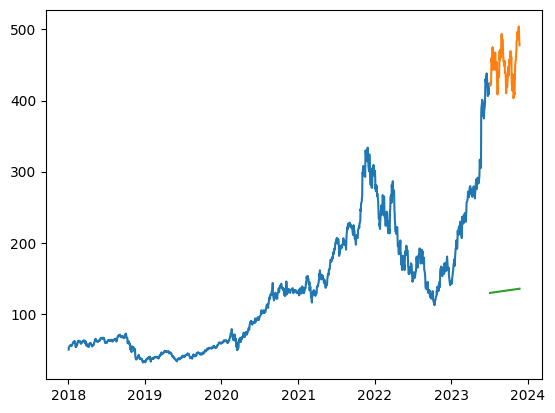

In [51]:
test_linear_nvda['Predictions'] = 0
test_linear_nvda['Predictions'] = predictionsLM_nvda

test_linear_nvda.index = df_nvda_stocks_linear.iloc[-100:].index
train_linear_nvda.index = df_nvda_stocks_linear.iloc[:-100].index

plt.plot(train_linear_nvda['Close'])
plt.plot(test_linear_nvda[['Close', 'Predictions']])

moving Average

In [52]:
train_mv = df_apple_stocks.iloc[:-100]
test_mv = df_apple_stocks.iloc[-100:]

predictors_mv= ["Close"]
train_mv= train_mv.set_index('Date')

In [53]:
train_mv

,Stock,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2018-01-02,AAPL,42.540001,43.075001,42.314999,43.064999,40.722870,102223600
2018-01-03,AAPL,43.132500,43.637501,42.990002,43.057499,40.715786,118071600
2018-01-04,AAPL,43.134998,43.367500,43.020000,43.257500,40.904907,89738400
2018-01-05,AAPL,43.360001,43.842499,43.262501,43.750000,41.370621,94640000
2018-01-08,AAPL,43.587502,43.902500,43.482498,43.587502,41.216965,82271200
...,...,...,...,...,...,...,...
2023-06-28,AAPL,187.929993,189.899994,187.600006,189.250000,188.746124,51216800
2023-06-29,AAPL,189.080002,190.070007,188.940002,189.589996,189.085205,46347300
2023-06-30,AAPL,191.630005,194.479996,191.259995,193.970001,193.453552,85069600


In [54]:
test_mv = test_mv.set_index('Date')

In [55]:

print(train_mv.shape)
print(test_mv.shape)

(1385, 7)
(100, 7)


In [56]:
predsFormv = []
for i in range(0,test_mv.shape[0]):
    a = train_mv['Close'][len(train_mv)-250+i:].sum() + sum(predsFormv)
    b = a/250
    predsFormv.append(b)

In [57]:
rms=np.sqrt(np.mean(np.power((np.array(test_mv['Close'])-predsFormv),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
26.80430888107338


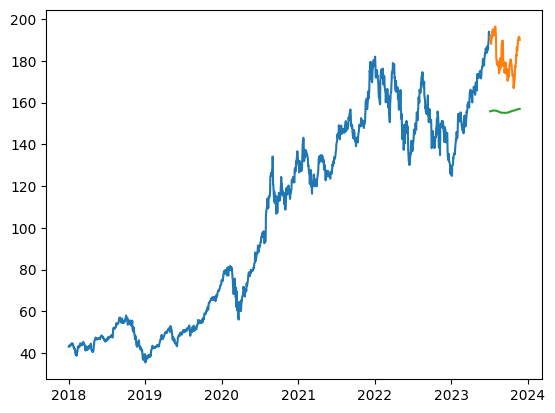

In [58]:

test_mv['Predictions'] = 0
test_mv['Predictions'] = predsFormv

plt.plot(train_mv['Close'])
plt.plot(test_mv[['Close', 'Predictions']])

In [60]:
test_mv

,Stock,Open,High,Low,Close,Adj Close,Volume,Predictions
Date,,,,,,,,
2023-07-06,AAPL,189.839996,192.020004,189.199997,191.809998,191.299301,45094300,155.841200
2023-07-07,AAPL,191.410004,192.669998,190.240005,190.679993,190.172302,46778000,155.879165
2023-07-10,AAPL,189.259995,189.990005,187.039993,188.610001,188.107834,59922200,155.914521
2023-07-11,AAPL,189.160004,189.300003,186.600006,188.080002,187.579239,46638100,155.958699
2023-07-12,AAPL,189.679993,191.699997,188.470001,189.770004,189.264740,60750200,155.999094
...,...,...,...,...,...,...,...,...
2023-11-17,AAPL,190.250000,190.380005,188.570007,189.690002,189.690002,50922700,156.849481
2023-11-20,AAPL,189.889999,191.910004,189.880005,191.449997,191.449997,46505100,156.871719
2023-11-21,AAPL,191.410004,191.520004,189.740005,190.639999,190.639999,38134500,156.907165


In [61]:
num_forecast_steps = 100  # Adjust as needed

for i in range(num_forecast_steps):
    a = test_mv['Close'][len(test_mv) - 250 + i:].sum() + sum(predsFormv)
    b = a / 250
    predsFormv.append(b)


last_timestamp = pd.Timestamp(test_mv.index[99])


forecast_index_mv = pd.date_range(start=last_timestamp + pd.Timedelta(days=1), periods=num_forecast_steps, freq='B')
forecast_df_mv = pd.DataFrame({'Predictions': predsFormv[-num_forecast_steps:]}, index=forecast_index)



In [62]:
last_timestamp

Timestamp('2023-11-24 00:00:00')

In [63]:
forecast_df_mv

,Predictions
2023-11-24,134.960041
2023-11-27,135.499881
2023-11-28,136.041880
2023-11-29,136.586048
2023-11-30,137.132392
...,...
2024-04-05,160.557660
2024-04-08,160.487171
2024-04-09,160.411680
2024-04-10,160.348126


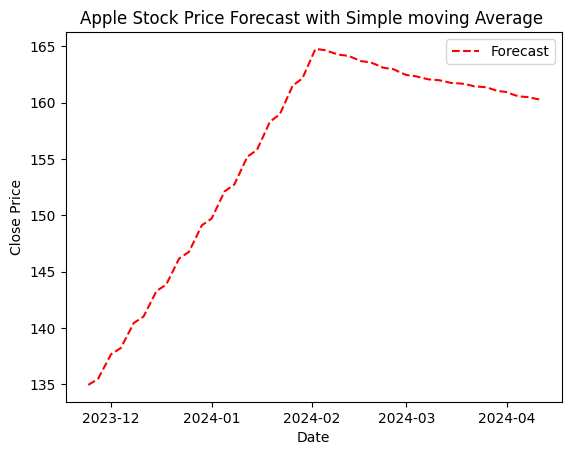

In [64]:

plt.plot(forecast_df.index,forecast_df_mv['Predictions'], label='Forecast', linestyle='dashed', color='red')

plt.title('Apple Stock Price Forecast with Simple moving Average ')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [65]:
forecast_df_mv

,Predictions
2023-11-24,134.960041
2023-11-27,135.499881
2023-11-28,136.041880
2023-11-29,136.586048
2023-11-30,137.132392
...,...
2024-04-05,160.557660
2024-04-08,160.487171
2024-04-09,160.411680
2024-04-10,160.348126


In [66]:
forecast_df.head(5)

,Forecast
2023-11-24,129.580701
2023-11-27,129.622438
2023-11-28,129.747649
2023-11-29,129.789386
2023-11-30,129.831123


moving average of google

In [68]:


train_mv_google = df_google_stocks.iloc[:-100]
test_mv_google = df_google_stocks.iloc[-100:]

predictors_mv= ["Close"]
train_mv_google= train_mv_google.set_index('Date')
test_mv_google = test_mv_google.set_index('Date')

In [69]:
predsFormvGoogle = []
for i in range(0,test_mv_google.shape[0]):
    a = train_mv_google['Close'][len(train_mv_google)-250+i:].sum() + sum(predsFormvGoogle)
    b = a/250
    predsFormvGoogle.append(b)

In [70]:
rms=np.sqrt(np.mean(np.power((np.array(test_mv_google['Close'])-predsFormvGoogle),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
28.89036534579635


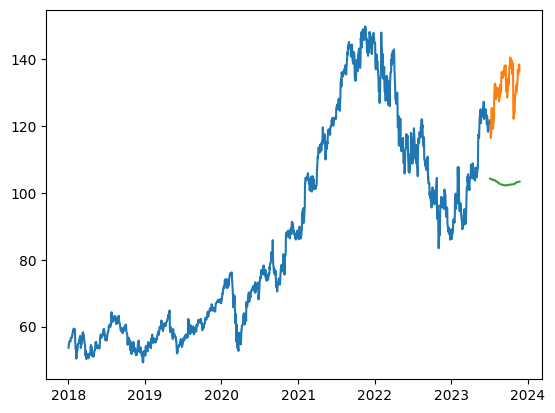

In [71]:

test_mv_google['Predictions'] = 0
test_mv_google['Predictions'] = predsFormvGoogle

plt.plot(train_mv_google['Close'])
plt.plot(test_mv_google[['Close', 'Predictions']])

In [72]:
num_forecast_steps = 100  

for i in range(num_forecast_steps):
    a = test_mv_google['Close'][len(test_mv_google) - 250 + i:].sum() + sum(predsFormvGoogle)
    b = a / 250
    predsFormvGoogle.append(b)


last_timestamp = pd.Timestamp(test_mv_google.index[99])


forecast_index_mv = pd.date_range(start=last_timestamp + pd.Timedelta(days=1), periods=num_forecast_steps, freq='B')
forecast_df_mv_google = pd.DataFrame({'Predictions': predsFormvGoogle[-num_forecast_steps:]}, index=forecast_index)



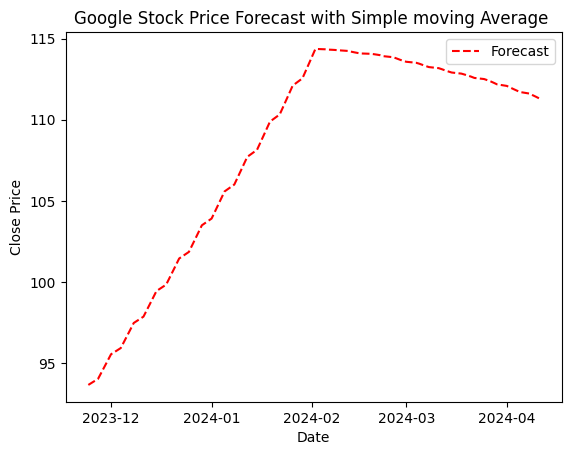

In [73]:

plt.plot(forecast_df_mv_google.index,forecast_df_mv_google['Predictions'], label='Forecast', linestyle='dashed', color='red')

plt.title('Google Stock Price Forecast with Simple moving Average ')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Moving average of NVDA

In [74]:
train_mv_nvda = df_nvda_stocks.iloc[:-100]
test_mv_nvda = df_nvda_stocks.iloc[-100:]

predictors_mv= ["Close"]
train_mv_nvda= train_mv_nvda.set_index('Date')
test_mv_nvda= test_mv_nvda.set_index('Date')

In [75]:
predsFormvNvda = []
for i in range(0,test_mv_nvda.shape[0]):
    a = train_mv_nvda['Close'][len(train_mv_nvda)-250+i:].sum() + sum(predsFormvNvda)
    b = a/250
    predsFormvNvda.append(b)

In [76]:
rms=np.sqrt(np.mean(np.power((np.array(test_mv_nvda['Close'])-predsFormvNvda),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
223.928051804604


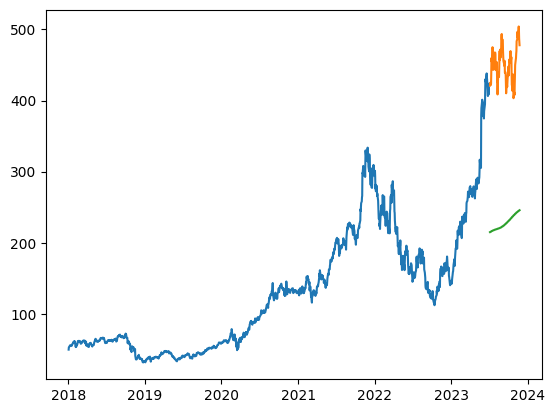

In [77]:

test_mv_nvda['Predictions'] = 0
test_mv_nvda['Predictions'] = predsFormvNvda

plt.plot(train_mv_nvda['Close'])
plt.plot(test_mv_nvda[['Close', 'Predictions']])

In [78]:
num_forecast_steps = 100  

for i in range(num_forecast_steps):
    a = test_mv_nvda['Close'][len(test_mv_nvda) - 250 + i:].sum() + sum(predsFormvNvda)
    b = a / 250
    predsFormvGoogle.append(b)


last_timestamp = pd.Timestamp(test_mv_nvda.index[99])


forecast_index_mv = pd.date_range(start=last_timestamp + pd.Timedelta(days=1), periods=num_forecast_steps, freq='B')
forecast_df_mv_nvda= pd.DataFrame({'Predictions': predsFormvNvda[-num_forecast_steps:]}, index=forecast_index)



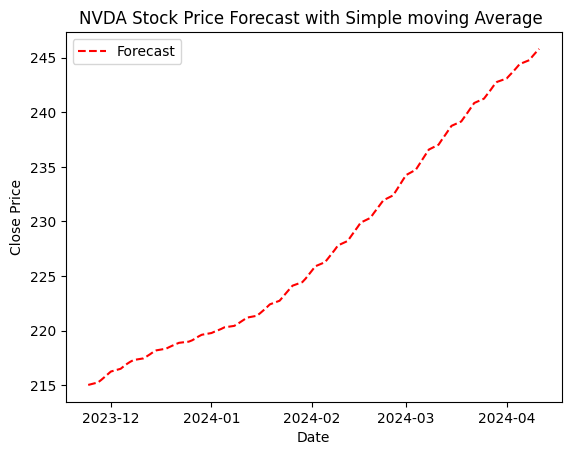

In [79]:

plt.plot(forecast_df_mv_nvda.index,forecast_df_mv_nvda['Predictions'], label='Forecast', linestyle='dashed', color='red')

plt.title('NVDA Stock Price Forecast with Simple moving Average ')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()